In [ ]:
col_list = ["date","price"]
import pandas as pd
df = pd.read_csv("Wheat Flour Dhaka Division.csv", usecols=col_list,parse_dates = ['date'])
df.head()

,date,price
0,2005-11-15,20.0
1,2005-12-15,20.0
2,2006-01-15,20.0
3,2006-02-15,20.0
4,2006-03-15,21.5


In [ ]:
df.describe()

,price
count,192.000000
mean,31.958509
std,5.422760
min,20.000000
25%,29.312425
50%,32.530900
75%,36.000000
max,44.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    192 non-null    datetime64[ns]
 1   price   192 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2005-11-15,20.0
1,2005-12-15,20.0
2,2006-01-15,20.0
3,2006-02-15,20.0
4,2006-03-15,21.5


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from fbprophet import Prophet
m = Prophet(interval_width = 0.95, weekly_seasonality = False,yearly_seasonality = False)
m.fit(df)
#Check Interval Width between 0.75 to 0.95 and weekly Seasonality and Yearly Seasonality True\False

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


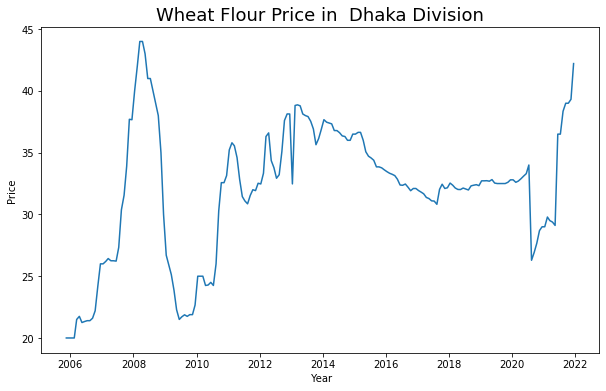

In [ ]:
plt.figure(facecolor='w',figsize=(10, 6))
plt.plot(df.ds,df.y)
plt.title('Wheat Flour Price in  Dhaka Division',size = 18)
plt.xlabel(' Year')
plt.ylabel('Price')
plt.show()

In [ ]:
future = m.make_future_dataframe(periods = 50,freq ='SMS')

forecast = m.predict(future)
forecast.tail(16)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
226,2023-06-01,32.338845,23.659304,41.041484,32.143391,32.595747,0.0,0.0,0.0,0.0,0.0,0.0,32.338845
227,2023-06-15,32.330473,23.284066,41.388691,32.128957,32.597879,0.0,0.0,0.0,0.0,0.0,0.0,32.330473
228,2023-07-01,32.320905,23.229888,41.500392,32.111594,32.596588,0.0,0.0,0.0,0.0,0.0,0.0,32.320905
229,2023-07-15,32.312533,23.481079,41.811544,32.094792,32.597151,0.0,0.0,0.0,0.0,0.0,0.0,32.312533
230,2023-08-01,32.302367,23.807808,41.526090,32.074553,32.595451,0.0,0.0,0.0,0.0,0.0,0.0,32.302367
231,2023-08-15,32.293995,23.529146,40.837021,32.058115,32.598052,0.0,0.0,0.0,0.0,0.0,0.0,32.293995
232,2023-09-01,32.283828,23.705865,41.608115,32.038111,32.601295,0.0,0.0,0.0,0.0,0.0,0.0,32.283828
233,2023-09-15,32.275456,23.323773,41.039841,32.022315,32.600430,0.0,0.0,0.0,0.0,0.0,0.0,32.275456
234,2023-10-01,32.265888,23.023680,41.319098,32.003568,32.599378,0.0,0.0,0.0,0.0,0.0,0.0,32.265888
235,2023-10-15,32.257516,23.790636,40.956160,31.987690,32.598271,0.0,0.0,0.0,0.0,0.0,0.0,32.257516


In [ ]:
df.shape

(192, 2)

In [ ]:
future.shape

(242, 1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Forecasting Price of Wheat Flour in Dhaka DIvision')

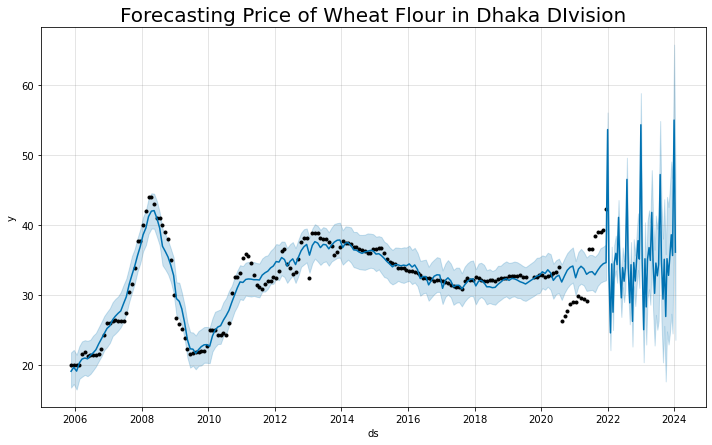

In [ ]:
m1 = Prophet(changepoint_prior_scale=0.5)
forecast1 = m1.fit(df).predict(future)
fig4 = m1.plot(forecast1)
a = fig4.gca()
a.set_title('Forecasting Price of Wheat Flour in Dhaka DIvision',size=20)

In [ ]:
from fbprophet.diagnostics import cross_validation
cv = cross_validation(m,initial = '100  days', period='50 days', horizon='300 days')

INFO:fbprophet:Making 110 forecasts with cutoffs between 2006-03-19 00:00:00 and 2021-02-18 00:00:00


  0%|          | 0/110 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:

In [ ]:
cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1067,2021-08-15,30.798139,22.028521,39.715516,38.35,2021-02-18
1068,2021-09-15,30.748009,21.915216,39.238398,39.00,2021-02-18
1069,2021-10-15,30.699495,21.939432,39.137387,39.00,2021-02-18
1070,2021-11-15,30.649364,22.336385,39.732090,39.32,2021-02-18
1071,2021-12-15,30.600851,21.612859,38.859492,42.21,2021-02-18


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(cv)
E = pd.DataFrame(df_pm)
E.to_csv('/content//drive//MyDrive/Dataset//Wheat Dhakha PM.csv')
#df_pm

In [1]:
col_list = ["date","price"]
import pandas as pd
df = pd.read_csv("Wheat Flour Dhaka Division.csv", usecols=col_list,parse_dates = ['date'])
df.head()

,date,price
0,2005-11-15,20.0
1,2005-12-15,20.0
2,2006-01-15,20.0
3,2006-02-15,20.0
4,2006-03-15,21.5


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from darts import TimeSeries
from darts.models import (
    NaiveDrift,
    NaiveSeasonal,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT,
    RNNModel,
    NaiveEnsembleModel,
    NBEATSModel,
    TCNModel,
    AutoARIMA,
    TBATS
    
)

from darts.metrics import mae
from darts .utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis

import warnings
warnings.filterwarnings('ignore')

import logging 
logging.disable(logging.CRITICAL)

In [3]:
series = TimeSeries.from_dataframe(df, 'date','price',fill_missing_dates=True, freq='SM')
series.head()

<TimeSeries (DataArray) (date: 5, component: 1, sample: 1)>
array([[[20.]],

       [[nan]],

       [[20.]],

       [[nan]],

       [[20.]]])
Coordinates:
  * date       (date) datetime64[ns] 2005-11-15 2005-11-30 ... 2006-01-15
  * component  (component) object 'price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

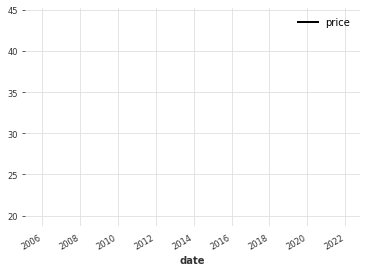

In [4]:
series.plot()

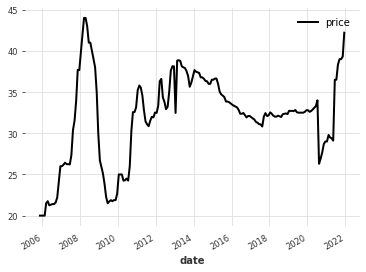

In [5]:
import darts
series = darts.utils.missing_values.fill_missing_values(series, fill='auto',)
series.plot()

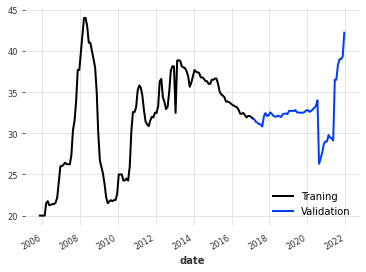

In [6]:
train, val = series.split_after(0.7)
train.plot(label = 'Traning')
val.plot(label = 'Validation')
plt.legend()

In [7]:
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()
train_scaled = scaler.fit_transform([train])

#train_scaled.plot()


Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

TCNModel = MAE :  0.7921465905051206


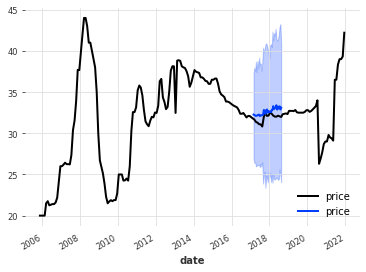

In [8]:
from darts.utils.likelihood_models import LaplaceLikelihood

model = TCNModel(
    input_chunk_length=24,
    output_chunk_length=12,
    random_state=42,
    likelihood=LaplaceLikelihood(),
)

model.fit(train_scaled, epochs=400, verbose=True);

pred = model.predict(n=36, num_samples=500)

# scale back:
pred = scaler.inverse_transform(pred)

series.plot()
pred.plot()

print("TCNModel = MAE : ",mae(series,pred))

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

NBEATSModel = MAE :  3.2790469633791623


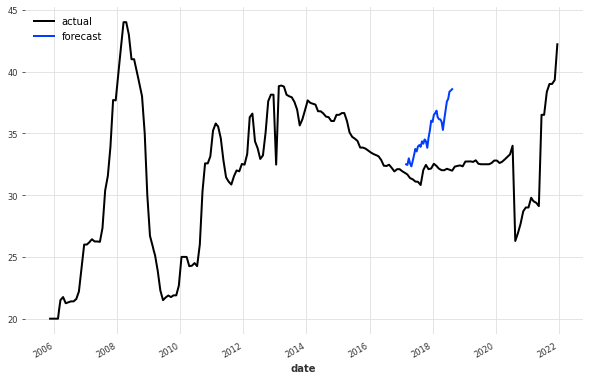

In [9]:
from darts.models import NBEATSModel

model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

model.fit(train_scaled, epochs=50, verbose=True);

pred = model.predict(n=36)


# scale back:
pred = scaler.inverse_transform(pred)

plt.figure(figsize=(10, 6))
series.plot(label="actual")
pred.plot(label="forecast")


print("NBEATSModel = MAE : ",mae(series,pred))

In [10]:
def evaluate_model(m):
    m.fit(train)
    forecast = m.predict(len(val))
    print("Model {} obtains MAE :{:}".format(m,mae(val,forecast)))

#evaluate_model(ExponentialSmoothing())
evaluate_model(TBATS())
evaluate_model(AutoARIMA())
evaluate_model(Theta())
evaluate_model(NaiveDrift())
evaluate_model(NaiveSeasonal())
evaluate_model(Prophet())
evaluate_model(ARIMA())
#evaluate_model(RegressionEnsembleModel())
#evaluate_model(RegressionModel())
evaluate_model(FFT())

Model (T)BATS obtains MAE :2.133379153933586
Model Auto-ARIMA obtains MAE :1.9105677838050548
Model Theta(2) obtains MAE :4.94477079660849
Model Naive drift model obtains MAE :2.410685696040868
Model Naive seasonal model, with K=1 obtains MAE :1.8040344827586199
Model Prophet obtains MAE :2.7982114104779097
Model ARIMA(12, 1, 0) obtains MAE :1.909204871819621
Model FFT(nr_freqs_to_keep=10, trend=None) obtains MAE :7.12706321229221


  0%|          | 0/154 [00:00<?, ?it/s]

NaiveEnsembleModel = MAE =  1.1257823739940558


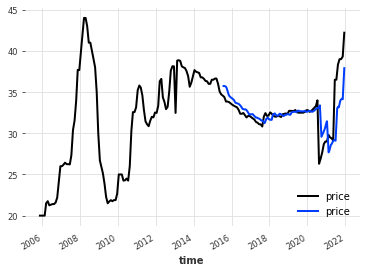

In [11]:
from darts.models import NaiveEnsembleModel

models = [NaiveDrift(), NaiveSeasonal(12)]

ensemble_model = NaiveEnsembleModel(models=models)

backtest = ensemble_model.historical_forecasts(
    series, start=0.6, forecast_horizon=3, verbose=True
)

print("NaiveEnsembleModel = MAE = " , (mae(backtest, series)))
series.plot()
backtest.plot()

Training: 0it [00:00, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 12it [00:00, ?it/s]

RNNModel = MAE =  1.3577334196141015


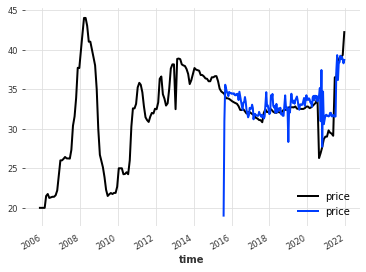

In [12]:
from darts.models import RNNModel

model = RNNModel(input_chunk_length=4)


model.fit(train_scaled)

backtest = model.historical_forecasts(series,start=0.6, forecast_horizon=3,verbose=True)
print("RNNModel = MAE = " , (mae(backtest, series)))
series.plot()
backtest.plot()